# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# reading the dataset

In [2]:
df=pd.read_csv('Bondora_raw.zip',low_memory=True)
df.head(10)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,180+
5,2020-01-27,621EEF09-2715-49CD-9C88-9C1F01231EAF,640,2009-06-05 17:39:56,2009-06-05 17:39:56,0,0,300.3845,lauri430,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
6,2020-01-27,1A8651C1-4CC8-4500-B88F-9C2300A2DA91,649,2009-06-09 09:52:55,2009-06-09 09:52:55,0,0,191.7350,Elvi Mägi,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,53.97,180+
7,2020-01-27,6C1252F6-32AC-4572-A41B-9C4B0128AF3D,824,2009-07-19 18:00:11,2009-07-19 18:00:11,0,0,31.9558,Margaret,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
8,2020-01-27,6D46EE23-3C61-4A69-8FBE-9C4C012A6C22,829,2009-07-20 18:06:31,2009-07-20 18:06:31,0,0,31.9559,Margaret,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
9,2020-01-27,1FD1C7F9-2391-442C-80F0-9C4D0116C4A8,832,2009-07-21 16:54:57,2009-07-21 16:54:57,0,0,319.5581,Elleriin,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN


In [3]:
df.shape

(134529, 112)

# creating a target variable

In [4]:
targ_var = df['Status']
targ_var

0         Repaid
1         Repaid
2           Late
3         Repaid
4         Repaid
           ...  
134524    Repaid
134525    Repaid
134526      Late
134527    Repaid
134528      Late
Name: Status, Length: 134529, dtype: object

# calculating percentage of missing values 

In [5]:
total_missing_values=df.isnull().sum()*100/ len(df)
print(total_missing_values)

ReportAsOfEOD                           0.000000
LoanId                                  0.000000
LoanNumber                              0.000000
ListedOnUTC                             0.000000
BiddingStartedOn                        0.000000
                                         ...    
NrOfScheduledPayments                  27.310840
ReScheduledOn                          70.027280
PrincipalDebtServicingCost             56.047395
InterestAndPenaltyDebtServicingCost    56.047395
ActiveLateLastPaymentCategory          61.160791
Length: 112, dtype: float64


In [6]:
#REMOVING ALL FEATURES WHICH HAVE MORE THAN 40%
df_null_values_less_than_40 = df.columns[total_missing_values < 40]
df_null_values_less_than_40

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome'

In [7]:
df[df.columns[df.isnull().mean() < 0.4]]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,NaN,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,NaN,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,NaN,NaN
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,NaN,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,NaN,NaN
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,NaN,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0000,0,0.0,60.0
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8000,0,NaN,NaN


In [8]:
missing_columns=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']

In [9]:
df_dropped_out_missing_columns = df.drop(missing_columns,axis=1)
df_dropped_out_missing_columns.shape

(134529, 77)

# some columns might also be removed as LoadID,LoanNumber,DateOfBirth

In [10]:
deleted_columns=['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [11]:
df_main=df_dropped_out_missing_columns.drop(deleted_columns,axis=1)

In [12]:
df_main.shape

(134529, 48)

# Creating a target variable

In [13]:
df_main.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'County', 'City', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'LastPaymentOn', 'DefaultDate', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsC

In [14]:
df_main.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [15]:
df_main[df_main.Status=='Current']

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
491,1355,0,645.0,True,2015-01-06,2015-02-16,2020-01-15,2021-01-15,3.0,4,...,True,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0
523,1000,0,0.0,False,2015-01-07,2015-03-06,2020-02-06,2021-11-08,4.0,1,...,True,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0
536,2345,0,655.0,False,2015-01-07,2015-02-16,2020-01-14,2024-02-23,3.0,1,...,True,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0
541,2045,0,955.0,True,2015-01-08,2015-02-20,2020-01-20,2021-01-04,3.0,4,...,True,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0
544,1500,0,0.0,True,2015-01-08,2015-02-25,2020-01-27,2020-01-27,1.0,1,...,False,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134429,560,0,40.0,False,2014-12-29,2015-02-25,2019-01-25,2022-05-25,4.0,1,...,True,NaN,288.83,704.39,311.17,0.0,2,7000.0,2436.06,0
134455,2175,0,2725.0,True,2014-12-30,2015-02-25,2020-01-27,2020-01-27,4.0,1,...,False,NaN,4748.29,4530.10,151.71,0.0,0,0.0,0.00,0
134483,1000,0,0.0,True,2015-01-02,2015-02-16,2020-01-15,2024-02-15,3.0,4,...,True,NaN,946.61,658.52,53.39,0.0,0,0.0,0.00,0
134486,635,0,3465.0,True,2015-01-02,2015-02-12,2020-01-13,2021-12-15,4.0,1,...,True,NaN,2246.60,7375.77,1853.40,0.0,0,0.0,0.00,0


 we can create a target variable for default date in which 0 will be assigned when null means borrower has never defaulted while 1 means default date is present

In [16]:
df_main['DefaultDate'].replace(np.nan,0,inplace=True)

In [17]:
for i in df_main.DefaultDate:
    if len(str(i))>1:
        df_main.DefaultDate.replace(i,1,inplace=True)

In [18]:
df_main.DefaultDate.head()

0    0
1    0
2    1
3    0
4    1
Name: DefaultDate, dtype: int64

 now checking the defaulted and not defaulted

In [19]:
df_main.DefaultDate.value_counts()

0    91614
1    42915
Name: DefaultDate, dtype: int64

In [20]:
df_main.drop(columns='Status',axis=1,inplace=True)

In [21]:
df_main.head().T

,0,1,2,3,4
BidsPortfolioManager,0,0,0,0,0
BidsApi,0,0,0,0,0
BidsManual,115.041,140.6057,319.558,57.5205,319.5582
NewCreditCustomer,True,False,True,True,True
LoanDate,2009-06-16,2009-06-15,2009-06-15,2009-06-15,2009-06-14
FirstPaymentDate,2009-07-27,2009-07-15,2009-07-27,2009-07-15,2009-07-27
MaturityDate_Original,2010-06-25,2009-07-15,2011-02-25,2010-09-15,2010-06-25
MaturityDate_Last,2010-06-25,2009-07-15,2014-05-13,2010-09-15,2010-06-25
VerificationType,2.0,2.0,2.0,2.0,2.0
LanguageCode,1,1,1,1,1


In [22]:
df_main.drop(columns='DefaultDate',axis =1,inplace=True)

In [23]:
df_main

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,2.0,1,...,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0
1,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,2.0,1,...,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0
2,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,2.0,1,...,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0
3,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,2.0,1,...,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0
4,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,2.0,1,...,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2515,0,485.0000,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,3.0,4,...,False,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0
134525,1880,0,1120.0000,False,2015-01-06,2015-03-05,2020-02-05,2019-02-20,3.0,4,...,False,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0
134526,1975,0,525.0000,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,1.0,4,...,False,NaN,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0000,0
134527,1840,0,1160.0000,False,2015-01-06,2015-03-02,2020-02-03,2020-08-03,4.0,1,...,True,NaN,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8000,0


In [24]:
df_main.shape

(134529, 46)

In [25]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    134529 non-null  int64  
 1   BidsApi                                 134529 non-null  int64  
 2   BidsManual                              134529 non-null  float64
 3   NewCreditCustomer                       134529 non-null  bool   
 4   LoanDate                                134529 non-null  object 
 5   FirstPaymentDate                        134529 non-null  object 
 6   MaturityDate_Original                   134529 non-null  object 
 7   MaturityDate_Last                       134529 non-null  object 
 8   VerificationType                        134484 non-null  float64
 9   LanguageCode                            134529 non-null  int64  
 10  Age                                     1345

In [26]:
'''
0 Not set ,1 Income unverified ,2 Income unverified, 
cross-referenced by phone, 3 Income verified ,4 Income and expenses verified
'''
df_main.VerificationType.replace({0.0:'Not set',
                               1.0:'Income unverified',
                               2.0:'Income unverified',
                               3.0:'Income verified',
                               4.0:'Income and expenses verified'},
                               inplace=True)

In [27]:
df_main.VerificationType.value_counts()

Income and expenses verified    74572
Income unverified               50476
Income verified                  9428
Not set                             8
Name: VerificationType, dtype: int64

In [28]:
'''
0 Male 1 Woman 2 Undefined
'''

df_main.Gender.replace({0.0:'Male',1.0:'Female',2.0:'Undefined'},inplace = True)

In [29]:
'''
1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian
'''

df_main.LanguageCode.replace({1:'Estonian',2:'English',3:'Russian',4:'Finnish',
                               5:'German',6:'Spanish',9:'Slovakian'},inplace=True)

df_main.LanguageCode.value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
22               6
German           5
15               1
10               1
13               1
7                1
21               1
Name: LanguageCode, dtype: int64

In [30]:
#dealing with other values other than from 1-9 as other
df_main.LanguageCode.replace({22:'other',21:'other',7:'other',
                           15:'other',10:'other',13:'other'},inplace = True)

In [31]:
df_main.LanguageCode.value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
other           11
German           5
Name: LanguageCode, dtype: int64

In [32]:
df_main.UseOfLoan.replace({-1:'Not set category',0:'Loan consolidation',1:'Real estate',2:'Home improvement',
                        3:'Business',4:'Education',5:'Travel',6:'Vehicle',7:'Other',8:'Health',
                        101:'Working capital financing',102:'Purchase of machinery equipment',
                        103:'Renovation of real estate',104:'Accounts receivable financing',
                        105:'Acquisition of means of transport',106:'Construction finance',
                        107:'Acquisition of stocks',108:'Acquisition of real estate',
                        109:'Guaranteeing obligation',110:'Other business'}, inplace = True)

In [33]:
df_main.Education.replace({1:'Primary',2:'Basic education',3:'Vocational education',
                        4:'Secondary education',5:'Higher education'},
                       inplace =True)
df_main.Education.value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary                 12057
Basic education          6427
0.0                         8
-1.0                        4
Name: Education, dtype: int64

In [34]:
df_main.Education.replace({-1:'Not_present',0:'Not_present'},inplace =True)
df_main.Education.value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary                 12057
Basic education          6427
Not_present                12
Name: Education, dtype: int64

In [35]:
df_main.MaritalStatus.replace({1:'Married',2:'Cohabitant',3:'Single',4:'Divorced',5:'Widow'},
                           inplace= True)

df_main.MaritalStatus.value_counts()

-1.0          97946
Single        12400
Married       10752
Cohabitant     9400
Divorced       3377
Widow           601
0.0               8
Name: MaritalStatus, dtype: int64

In [36]:
df_main.MaritalStatus.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)
df_main.MaritalStatus.value_counts()

Not_specified    97954
Single           12400
Married          10752
Cohabitant        9400
Divorced          3377
Widow              601
Name: MaritalStatus, dtype: int64

In [37]:
df_main.EmploymentStatus.replace({1:'Unemployed',2:'Partially employed',3:'Fully employed',
                               4:'Self-employed',5:'Entrepreneur',6:'Retiree'},inplace = True)


In [38]:
'''Did the customer have prior credit history in Bondora
0 Customer had at least 3 months of credit history in Bondora 
1 No prior credit history in Bondora
'''
df_main.NewCreditCustomer.replace({True:0,False:1},inplace = True)

In [39]:
# The original maturity date of the loan has been increased by more than 60 day
df_main.Restructured.replace({1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',
                             7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',
                             10:'Info and telecom',11:'Finance and insurance',12:'Real-estate',13:'Research',
                             14:'Administrative',15:'Civil service & military',16:'Education',
                             17:'Healthcare and social help',18:'Art and entertainment',19:'Agriculture,forestry and fishing'},
                            inplace = True)

In [40]:
df_main.OccupationArea.replace({1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',
                             7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',
                             10:'Info and telecom',11:'Finance and insurance',12:'Real-estate',13:'Research',
                             14:'Administrative',15:'Civil service & military',16:'Education',
                             17:'Healthcare and social help',18:'Art and entertainment',19:'Agriculture,forestry and fishing'},
                            inplace = True)

In [41]:
df_main.HomeOwnershipType.replace({0:'Homeless',1:'Owner',2:'Living with parents',3:'Tenant, pre-furnished property',
                                4:'Tenant, unfurnished property',5:'Council house',6:'Joint tenant',
                                7:'Joint ownership',8:'Mortgage',9:'Owner with encumbrance',
                                10:'Other'},inplace = True)

In [42]:
df_main.EmploymentStatus.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)


#OccupationArea columns value replacement
df_main.OccupationArea.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)

#HomeOwnershipType columns value replacement
df_main.HomeOwnershipType.replace({-1:'Not_specified'},inplace = True)

In [43]:
df_main.OccupationArea.value_counts()

Not_specified                       98008
Other                                8421
Retail and wholesale                 3587
Construction                         3312
Processing                           3198
Transport and warehousing            2462
Healthcare and social help           2424
Hospitality and catering             2262
Info and telecom                     1933
Civil service & military             1684
Education                            1430
Finance and insurance                1148
Agriculture,forestry and fishing     1000
Administrative                        843
Art and entertainment                 619
Energy                                587
Research                              564
Real-estate                           477
Utilities                             362
Mining                                122
Name: OccupationArea, dtype: int64

In [44]:
df_main.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0,0,115.0410,0,2009-06-16,2009-07-27,2010-06-25,2010-06-25,Income unverified,Estonian,...,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0
1,0,0,140.6057,1,2009-06-15,2009-07-15,2009-07-15,2009-07-15,Income unverified,Estonian,...,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0
2,0,0,319.5580,0,2009-06-15,2009-07-27,2011-02-25,2014-05-13,Income unverified,Estonian,...,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0
3,0,0,57.5205,0,2009-06-15,2009-07-15,2010-09-15,2010-09-15,Income unverified,Estonian,...,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0
4,0,0,319.5582,0,2009-06-14,2009-07-27,2010-06-25,2010-06-25,Income unverified,Estonian,...,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0


In [45]:
df_main.MaturityDate_Last=pd.to_datetime(df_main['MaturityDate_Last'])
df_main.LoanDate=pd.to_datetime(df_main['LoanDate'])
df_main.FirstPaymentDate=pd.to_datetime(df_main['FirstPaymentDate'])
df_main.MaturityDate_Original=pd.to_datetime(df_main['MaturityDate_Original'])
df_main.LastPaymentOn=pd.to_datetime(df_main['LastPaymentOn'])


In [46]:
df_main['MaturityDate_Last_year'] = df_main.MaturityDate_Last.dt.year
df_main['MaturityDate_Last_month'] = df_main.MaturityDate_Last.dt.month
df_main['MaturityDate_Last_day'] = df_main.MaturityDate_Last.dt.day

df_main['LoanDate_year']=df_main.LoanDate.dt.year
df_main['LoanDate_month']=df_main.LoanDate.dt.month
df_main['LoanDate_day']=df_main.LoanDate.dt.day

df_main['FirstPaymentDate_year']=df_main.FirstPaymentDate.dt.year
df_main['FirstPaymentDate_month']=df_main.FirstPaymentDate.dt.month
df_main['FirstPaymentDate_day']=df_main.FirstPaymentDate.dt.day

df_main['MaturityDate_Original_year']=df_main.MaturityDate_Original.dt.year
df_main['MaturityDate_Original_month']=df_main.MaturityDate_Original.dt.month
df_main['MaturityDate_Original_day']=df_main.MaturityDate_Original.dt.day

df_main['LastPaymentOn_year']=df_main.LastPaymentOn.dt.year
df_main['LastPaymentOn_month']=df_main.LastPaymentOn.dt.month
df_main['LastPaymentOn_day']=df_main.LastPaymentOn.dt.day

In [47]:
df_main=df_main.drop(['MaturityDate_Last','LoanDate','FirstPaymentDate','MaturityDate_Original','LastPaymentOn'],axis =1)
df_main.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.0410,0,Income unverified,Estonian,61,Female,EE,319.5582,...,16,2009,7,27,2010,6,25,2010.0,7.0,6.0
1,0,0,140.6057,1,Income unverified,Estonian,48,Female,EE,191.7349,...,15,2009,7,15,2009,7,15,2009.0,7.0,7.0
2,0,0,319.5580,0,Income unverified,Estonian,58,Female,EE,319.5582,...,15,2009,7,27,2011,2,25,2012.0,10.0,1.0
3,0,0,57.5205,0,Income unverified,Estonian,23,Female,EE,127.8233,...,15,2009,7,15,2010,9,15,2010.0,9.0,15.0
4,0,0,319.5582,0,Income unverified,Estonian,25,Female,EE,319.5582,...,14,2009,7,27,2010,6,25,2015.0,7.0,16.0


In [48]:
#NUMERICAL AND CATEGORICAL FEATURES
numerical_cols=[col for col in df_main.columns if df_main[col].dtype!=object]
categorical_cols=[col for col in df_main.columns if df_main[col].dtype==object]
print("No of Numerical features =",len(numerical_cols))
print("No of Categorical features =",len(categorical_cols))

No of Numerical features = 41
No of Categorical features = 15


# dealing with missing values

In [49]:
numerical_columns=df_main.select_dtypes(include=np.number)
numerical_columns.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.0410,0,61,319.5582,115.0408,30.0,12,NaN,...,16,2009,7,27,2010,6,25,2010.0,7.0,6.0
1,0,0,140.6057,1,48,191.7349,140.6057,25.0,1,NaN,...,15,2009,7,15,2009,7,15,2009.0,7.0,7.0
2,0,0,319.5580,0,58,319.5582,319.5409,25.0,20,NaN,...,15,2009,7,27,2011,2,25,2012.0,10.0,1.0
3,0,0,57.5205,0,23,127.8233,57.5205,45.0,15,NaN,...,15,2009,7,15,2010,9,15,2010.0,9.0,15.0
4,0,0,319.5582,0,25,319.5582,319.5436,30.0,12,NaN,...,14,2009,7,27,2010,6,25,2015.0,7.0,16.0


In [50]:
categorical_columns=df_main.select_dtypes('object')
categorical_columns.head()
categorical_columns.shape

(134529, 15)

In [51]:
def Numerical_Summary():
    for col in numerical_cols:
        print(col)
        print("No of Missing Values =",df_main[col].isnull().sum())
        print("Skew =",df_main[col].skew())
        print("Histogram")
        fig=px.histogram(data_frame=df_main,x=col)
        fig.show()
        print("="*50)
        
def Categorical_Summary():
    for col in categorical_cols:
        print(col)
        print("No of Missin Values =",df_main[col].isnull().sum())
        print(df_main[col].value_counts())
        print("="*50)
        

In [52]:
loan_df = df_main.copy()
loan_df =df_main[df_main['Age']>10]
loan_df=df_main[df_main['Age']>10]
loan_df=df_main[df_main['AppliedAmount']>0]
loan_df=df_main[df_main['DebtToIncome']<100]
loan_df=df_main[df_main['CreditScoreEsMicroL']!=0]
loan_df=df_main[df_main['PrincipalBalance']>=0]

In [53]:
loan_df = df_main.copy()
loan_df =loan_df[loan_df['Age']>10]
loan_df=loan_df[loan_df['Age']>10]
loan_df=loan_df[loan_df['AppliedAmount']>0]
loan_df=loan_df[loan_df['DebtToIncome']<100]
loan_df=loan_df[loan_df['CreditScoreEsMicroL']!=0]
loan_df=loan_df[loan_df['PrincipalBalance']>=0]

In [54]:
print(df_main.shape)
print(loan_df.shape)

(134529, 56)
(134469, 56)


In [55]:
Categorical_Summary()

VerificationType
No of Missin Values = 45
Income and expenses verified    74572
Income unverified               50476
Income verified                  9428
Not set                             8
Name: VerificationType, dtype: int64
LanguageCode
No of Missin Values = 0
Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
other           11
German           5
Name: LanguageCode, dtype: int64
Gender
No of Missin Values = 45
Male         85650
Female       38213
Undefined    10621
Name: Gender, dtype: int64
Country
No of Missin Values = 0
EE    77335
FI    32650
ES    24248
SK      296
Name: Country, dtype: int64
County
No of Missin Values = 36840
Harju maakond         22224
HARJU                  8108
Tartu maakond          6181
UUSIMAA                6076
Ida-Viru maakond       4197
                      ...  
KILVAKKALA                1
IRUN GIPUZKOA             1
PÄRNUMAA   PÄRNU          1
ETELÄ - POHJANMAA         1
POHJOIS-

In [56]:
# numerical_columns.isnull().sum()
numerical_columns=numerical_columns.fillna(numerical_columns.mean().iloc[0])
numerical_columns.isnull().sum()
numerical_columns.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,...,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.0410,0,61,319.5582,115.0408,30.0,12,966.452876,...,16,2009,7,27,2010,6,25,2010.0,7.0,6.0
1,0,0,140.6057,1,48,191.7349,140.6057,25.0,1,966.452876,...,15,2009,7,15,2009,7,15,2009.0,7.0,7.0
2,0,0,319.5580,0,58,319.5582,319.5409,25.0,20,966.452876,...,15,2009,7,27,2011,2,25,2012.0,10.0,1.0
3,0,0,57.5205,0,23,127.8233,57.5205,45.0,15,966.452876,...,15,2009,7,15,2010,9,15,2010.0,9.0,15.0
4,0,0,319.5582,0,25,319.5582,319.5436,30.0,12,966.452876,...,14,2009,7,27,2010,6,25,2015.0,7.0,16.0


In [57]:
# numerical_columns.isnull().sum()
categorical_columns=categorical_columns.fillna(categorical_columns.mode().iloc[0])
categorical_columns.isnull().sum()
categorical_columns.head()

,VerificationType,LanguageCode,Gender,Country,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL
0,Income unverified,Estonian,Female,EE,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,E,M
1,Income unverified,Estonian,Female,EE,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,E,M
2,Income unverified,Estonian,Female,EE,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,E,M
3,Income unverified,Estonian,Female,EE,HARJU,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,E,M
4,Income unverified,Estonian,Female,EE,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,E,M


<AxesSubplot:>

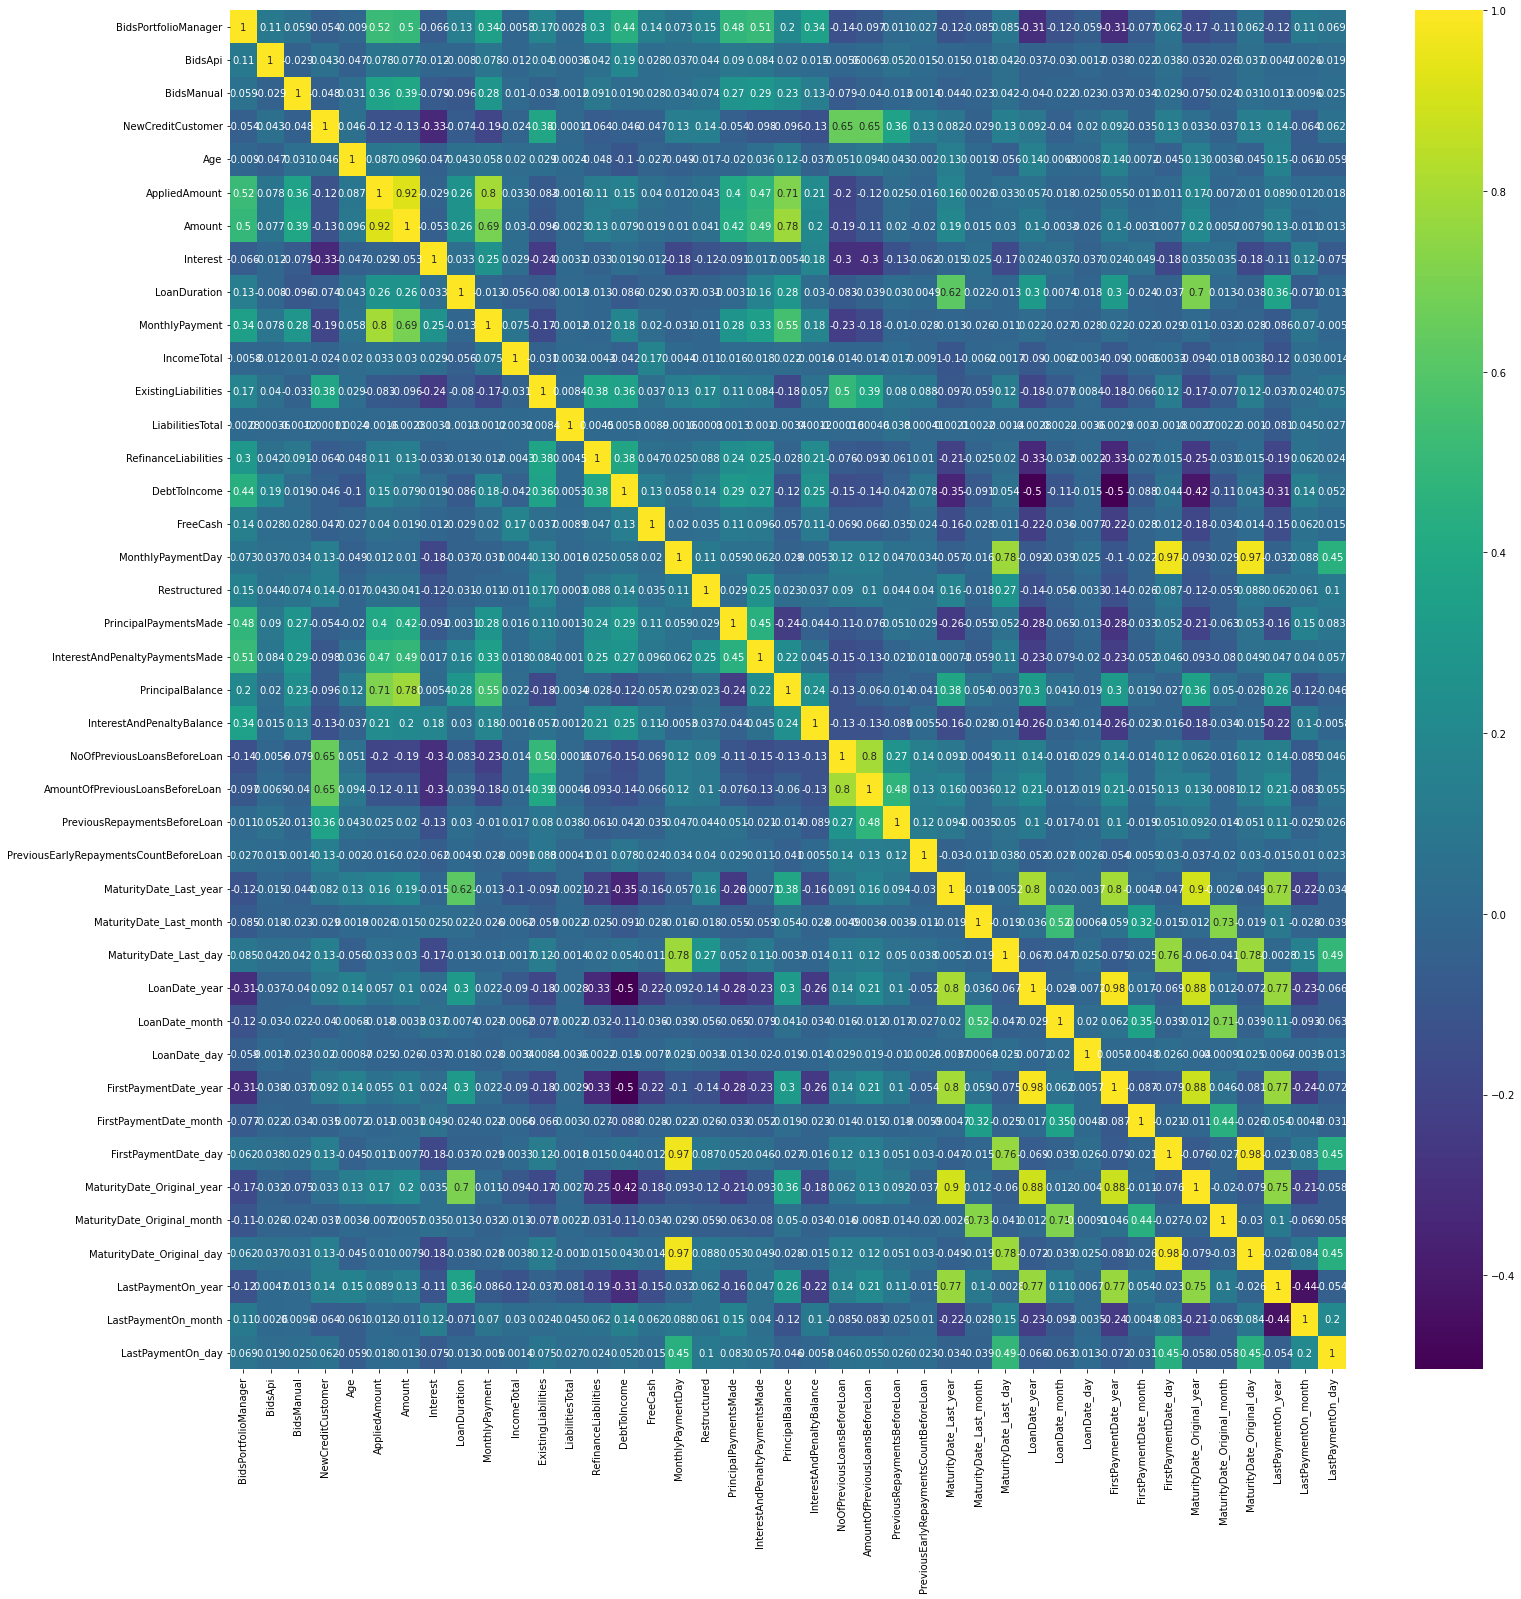

In [58]:
plt.figure(figsize=(25,25))
sns.heatmap(loan_df[numerical_cols].corr(),annot=True,cmap='viridis')

In [59]:
pd.crosstab(targ_var , df_main['UseOfLoan'])

UseOfLoan,Accounts receivable financing,Acquisition of real estate,Acquisition of stocks,Business,Construction finance,Education,Health,Home improvement,Loan consolidation,Not set category,Other,Other business,Purchase of machinery equipment,Real estate,Travel,Vehicle,Working capital financing
Status,,,,,,,,,,,,,,,,,
Current,0,0,0,207,0,107,152,1089,495,53769,772,0,0,112,166,266,0
Late,0,0,0,813,0,585,649,4007,2665,30432,4371,0,0,366,741,1143,0
Repaid,6,1,2,930,1,674,718,4095,3754,13745,4555,17,21,477,880,1741,5


# preprocessing the Categorical Data

In [60]:
#using Z-score
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [61]:
categorical_columns.head()

,VerificationType,LanguageCode,Gender,Country,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL
0,Income unverified,Estonian,Female,EE,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,E,M
1,Income unverified,Estonian,Female,EE,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,E,M
2,Income unverified,Estonian,Female,EE,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,E,M
3,Income unverified,Estonian,Female,EE,HARJU,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,E,M
4,Income unverified,Estonian,Female,EE,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,E,M


In [62]:
encode_cat = categorical_columns.apply(LabelEncoder().fit_transform)
encode_cat

,VerificationType,LanguageCode,Gender,Country,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL
0,1,1,0,0,234,6398,10,5,2,1,6,17,8,5,0
1,1,1,0,0,283,2709,10,1,1,1,0,5,8,5,0
2,1,1,0,0,732,5188,7,4,2,1,7,9,8,5,0
3,1,1,0,0,234,4689,8,0,4,2,5,13,8,5,0
4,1,1,0,0,856,6446,15,4,0,1,5,17,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2,2,1,2,724,3258,8,5,4,1,0,13,0,5,0
134525,2,2,1,2,665,2231,7,5,4,1,0,18,8,2,0
134526,1,2,1,2,934,5981,8,5,2,0,0,4,8,4,0
134527,0,1,0,0,916,6955,10,1,2,1,0,8,11,2,0


In [63]:
df_main_dummy = pd.concat([numerical_columns,encode_cat], axis=1)

# display first five observations
df_main_dummy.head()
df_main_dummy.shape

(134529, 55)

# Random forest

In [66]:
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [67]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_main_dummy.copy()
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = targ_var.copy()
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

print('X_clms: ',X_full.columns)# dependent variable

X_train_full (94170, 56)
y_train_full (94170,)
X_test_full (40359, 56)
y_test_full (40359,)
X_clms:  Index(['const', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'Age', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'MaturityDate_Last_year',
       'MaturityDate_Last_month', 'MaturityDate_Last_day', 'LoanDate_year',
       'LoanDate_month', 'LoanDate_day', 'FirstPaymentDate_year',
       'FirstPaymentDate_month', 'FirstPaymentDate_day',
       'MaturityDate_Original_year', 'MaturityDate_Original_month',
     

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf_classification=RandomForestClassifier(n_estimators=10,random_state=10)

In [71]:
rf_model=rf_classification.fit(X_train_full,y_train_full)

In [72]:
rf_model1=rf_classification.fit(X_test_full,y_test_full)

In [73]:
from sklearn.metrics import classification_report

In [74]:
predict_rftrain=rf_model.predict(X_train_full)
predict_rftest=rf_model1.predict(X_test_full)

In [75]:
print(classification_report(y_train_full,predict_rftrain))

              precision    recall  f1-score   support

     Current       0.99      0.97      0.98     40027
        Late       0.96      0.99      0.97     32090
      Repaid       1.00      1.00      1.00     22053

    accuracy                           0.98     94170
   macro avg       0.98      0.98      0.98     94170
weighted avg       0.98      0.98      0.98     94170



In [76]:
print(classification_report(y_test_full,predict_rftest))

              precision    recall  f1-score   support

     Current       1.00      1.00      1.00     17108
        Late       1.00      1.00      1.00     13682
      Repaid       1.00      1.00      1.00      9569

    accuracy                           1.00     40359
   macro avg       1.00      1.00      1.00     40359
weighted avg       1.00      1.00      1.00     40359



In [77]:
feature_scores = pd.Series(rf_model1.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
feature_scores

InterestAndPenaltyBalance                 0.343857
PrincipalBalance                          0.170966
LastPaymentOn_month                       0.084591
LastPaymentOn_year                        0.083798
PrincipalPaymentsMade                     0.050346
FirstPaymentDate_year                     0.035677
InterestAndPenaltyPaymentsMade            0.026018
LoanDate_year                             0.025591
DebtToIncome                              0.021184
PreviousRepaymentsBeforeLoan              0.019578
MaturityDate_Last_year                    0.018809
MaturityDate_Original_year                0.013259
LastPaymentOn_day                         0.011065
MonthlyPayment                            0.008873
Amount                                    0.005848
Interest                                  0.005710
MaturityDate_Last_day                     0.005251
MaturityDate_Original_month               0.005207
FirstPaymentDate_day                      0.004450
CreditScoreEsMicroL            

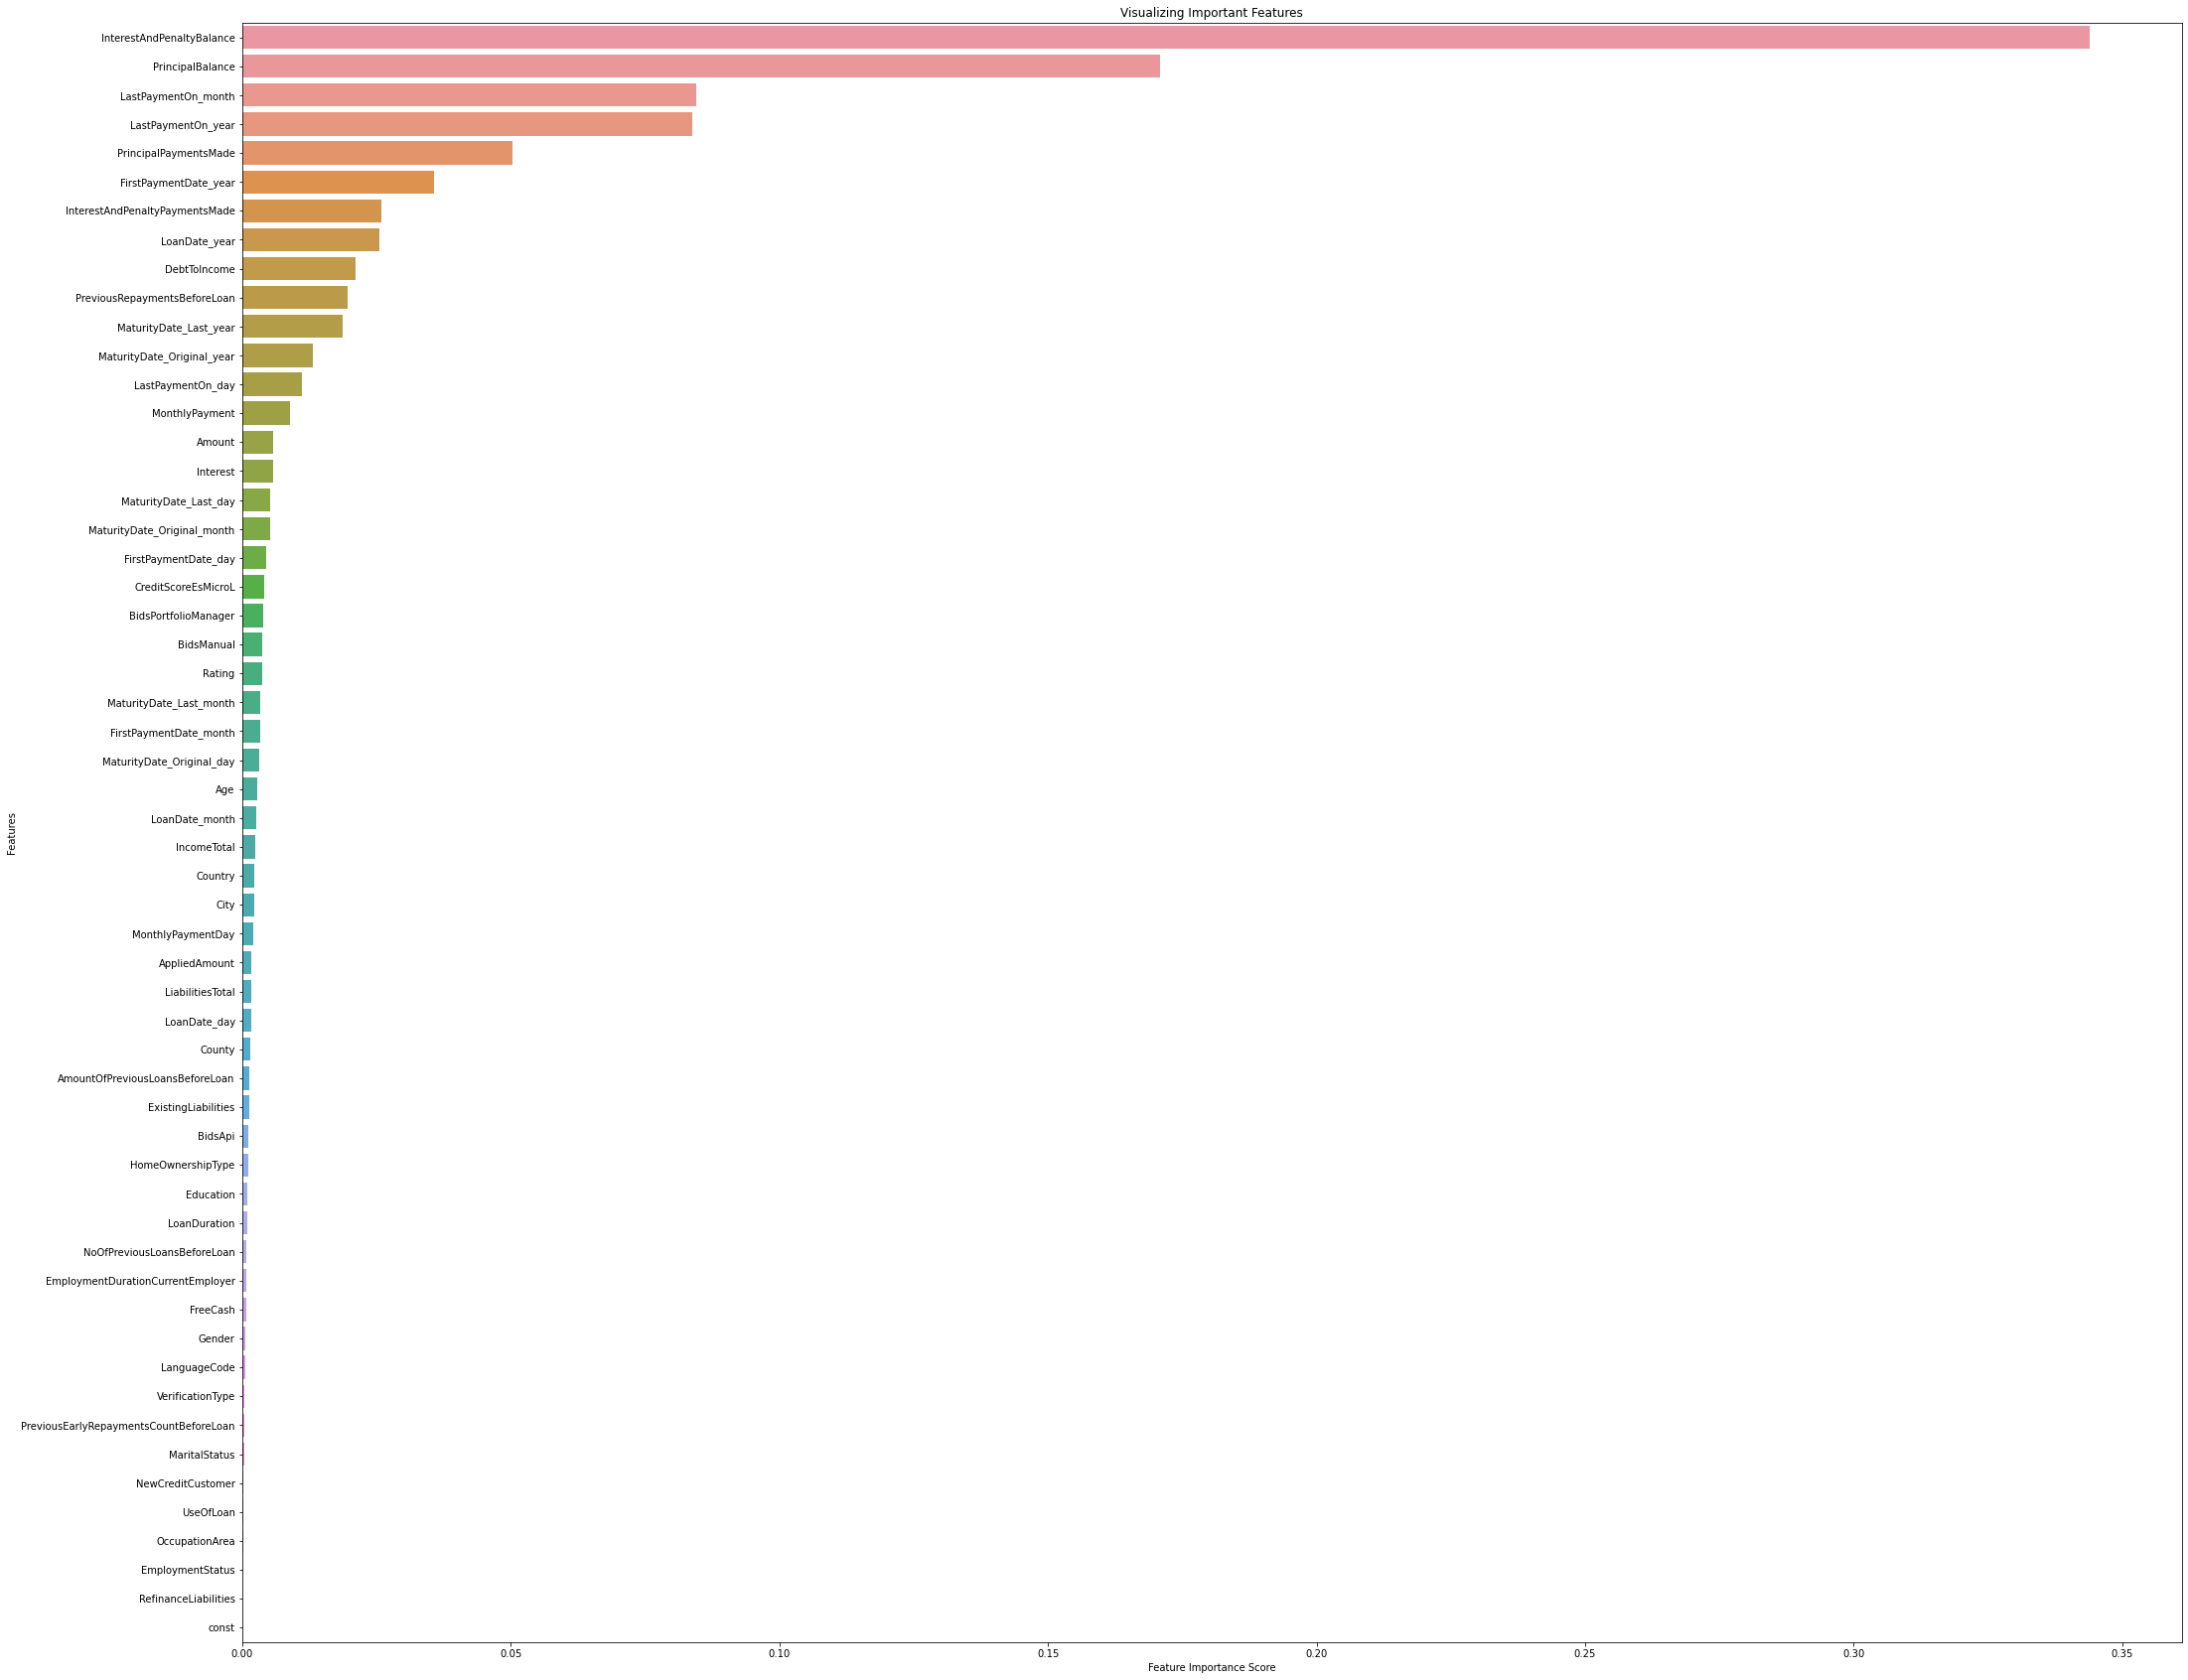

In [80]:
plt.figure(figsize=(35,30))
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

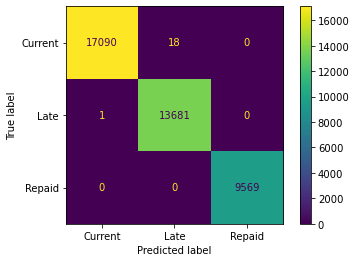

In [97]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_model1,X_test_full,y_test_full)

# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
LR = LogisticRegression()
base_model = LR.fit(X_train_full,y_train_full)

In [84]:
predict = base_model.predict(X_train_full)
predict

array(['Current', 'Current', 'Current', ..., 'Current', 'Repaid',
       'Current'], dtype=object)

In [85]:
predictx = base_model.predict(X_test_full)
predictx

array(['Current', 'Late', 'Late', ..., 'Repaid', 'Late', 'Current'],
      dtype=object)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_train_full,predict)

array([[38971,   713,   343],
       [ 4415, 27523,   152],
       [   30,    34, 21989]], dtype=int64)

<AxesSubplot:ylabel='count'>

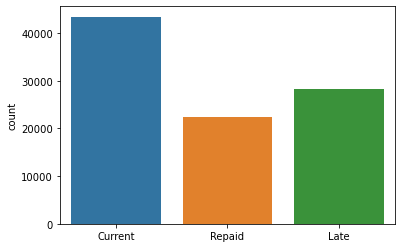

In [88]:
sns.countplot(x=predict)

In [89]:
print(classification_report(y_train_full,predict))

              precision    recall  f1-score   support

     Current       0.90      0.97      0.93     40027
        Late       0.97      0.86      0.91     32090
      Repaid       0.98      1.00      0.99     22053

    accuracy                           0.94     94170
   macro avg       0.95      0.94      0.94     94170
weighted avg       0.94      0.94      0.94     94170



In [90]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_full,predictx))

              precision    recall  f1-score   support

     Current       0.90      0.98      0.94     17108
        Late       0.98      0.86      0.92     13682
      Repaid       0.98      1.00      0.99      9569

    accuracy                           0.94     40359
   macro avg       0.95      0.95      0.95     40359
weighted avg       0.95      0.94      0.94     40359



In [91]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(LR.score(X_train_full, y_train_full)))


Accuracy of logistic regression classifier on train set: 0.94


In [92]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test_full, y_test_full)))

Accuracy of logistic regression classifier on test set: 0.94


In [93]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test_full,predictx))

Accuracy :  0.9430362496593078


In [94]:
comparison = pd.DataFrame({'Predicted Values':predictx,'Actual Values':y_test_full})
comparison

,Predicted Values,Actual Values
30069,Current,Late
87389,Late,Late
13853,Late,Late
93997,Repaid,Repaid
89449,Current,Current
...,...,...
107406,Late,Late
95761,Current,Current
62273,Repaid,Repaid
70989,Late,Late


In [95]:
c_matrix = confusion_matrix(y_test_full, predictx)  
print ("Confusion matrix : \n", c_matrix)

Confusion matrix : 
 [[16687   260   161]
 [ 1800 11825    57]
 [    5    16  9548]]


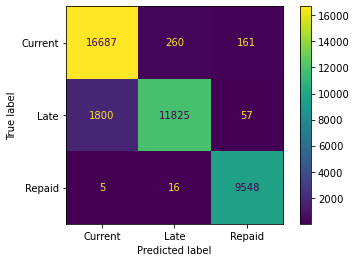

In [96]:
plot_confusion_matrix(LR,X_test_full,y_test_full)